# 4주차_선형회귀분석

## 1. 모듈 불러오기

### 사이트 참고
- https://datascienceschool.net/notebook/

### statsmodels
- 다양한 통계분석 기능을 제공하는 파이썬 패키지

### sklearn
- 벤치마크용 데이터셋 예제
- 데이터 전처리(preprocessing)
- 모형 평가 및 선택 (evaluation and selection)

### matplotlib
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지

In [0]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 2. 데이터 불러오기: California Housing Data
#### 데이터 구조  
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

#### 설명 변수(예측값을 설명할 수 있는 변수)      
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도 

#### 반응 변수(예측하고자 하는 값)
- House Value: 주택가격

In [191]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [192]:
print(california.feature_names)
print(california.data)
# print(california.target_names) # 모든 데이터가 target_names를 지원하지 않음.
print(california.target)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [0]:
X = pd.DataFrame(california.data, columns=california.feature_names) # 설명 변수
y = pd.DataFrame(california.target, columns=['House Value']) # Target 명을 House Value 라고 명명 # 반응 변수

## 3. 데이터 전처리

In [194]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [195]:
y.head()

,House Value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [0]:
data = pd.concat([X, y], axis=1) # Data 하나로 합침

In [197]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [198]:
data.shape

(20640, 9)

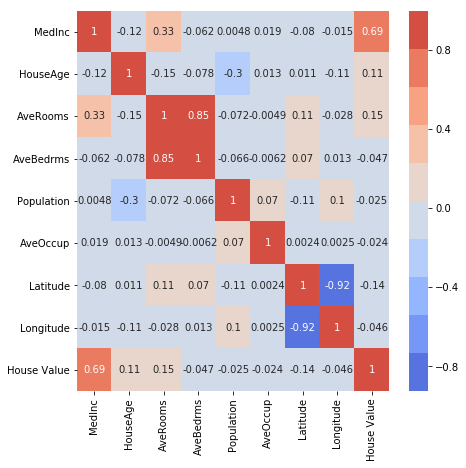

In [199]:
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr()) # 변수간 상관관계 확인

In [221]:
dataTemp = data.drop(['AveBedrms'],axis=1) # 변수간 상관관계가 높은 변수 제거
dataTemp.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


### 모델을 학습(train) 및 테스트(test) 데이터로 분리


In [0]:
train_data, test_data = train_test_split(data, random_state=20191008) # test_size Default 0.25

In [0]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20191008)

In [203]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1.361
12383,3.3120,17.0,6.451758,1.390426,3497.0,2.615557,33.72,-116.37,1.213
18099,5.7528,27.0,6.437358,1.027335,1259.0,2.867882,37.32,-122.04,4.314
8951,2.1250,39.0,4.096154,0.846154,138.0,2.653846,34.03,-118.37,1.964
613,4.6042,51.0,6.664122,1.025445,922.0,2.346056,37.73,-122.14,2.519


In [204]:
train_data.shape

(14448, 9)

In [205]:
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
14711,4.6250,21.0,6.589165,1.119639,984.0,2.221219,32.78,-117.08,2.228
10227,3.0465,32.0,4.064767,1.093264,835.0,2.163212,33.87,-117.89,1.489
17724,6.6800,10.0,7.329016,1.020725,1510.0,3.911917,37.33,-121.78,3.595
18612,6.0809,21.0,6.474168,1.026406,2670.0,3.065442,37.08,-122.07,2.700
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28,1.214


In [206]:
test_data.shape

(6192, 9)

## 4. 모델링
 - import statsmodels.api as sm
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [0]:
myModel = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))

In [0]:
myModel_trained = myModel.fit() # 모델 학습

## 5. 모델 해석

In [209]:
display(myModel_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.486e+04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                        0.00
Time:                        10:32:10   Log-Likelihood:                         -16930.
No. Observations:               14448   AIC:                                  3.388e+04
Df Residuals:                   14440   BIC:                                  3.394e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5034      0.005    100.271      0.000       0.494       0.513
HouseAge       0.0158      0.001     28.486      0.000       0.015       0.017
AveRooms      -0.1704      0.007    -23.384      0.000      -0.185      -0.156
AveBedrms      0.8086      0.035     23.181      0.000       0.740       0.877
Population  1.353e-05   6.09e-06      2.222      0.026    1.59e-06    2.55e-05
AveOccup      -0.0042      0.001     -7.279      0.000      -0.005      -0.003
Latitude      -0.0654      0.004    -15.214      0.000      -0.074      -0.057
Longitude     -0.0170      0.001    -12.471      0.000      -0.020      -0.014
==============================================================================
Omnibus:                     3170.990   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9961.755
Skew:                           1.121   Prob(JB):                         0.00
Kurtosis:                       6.395   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
not_significants = myModel_trained.pvalues.index[myModel_trained.pvalues > 0.01] # 상대적으로 가중치가 낮은 변수
print(not_significants)

Index(['Population'], dtype='object')


In [222]:
dataTemp = data.drop(not_significants,axis=1) # 가중치가 낮은 변수 제거
dataTemp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,3.422


## 6. 예측 값 도출 및 예측 성능 평가

### 학습 데이터 (Training Data)에 대한 (1) 예측 및 (2) 성능 평가

In [212]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1.361
12383,3.3120,17.0,6.451758,1.390426,3497.0,2.615557,33.72,-116.37,1.213
18099,5.7528,27.0,6.437358,1.027335,1259.0,2.867882,37.32,-122.04,4.314
8951,2.1250,39.0,4.096154,0.846154,138.0,2.653846,34.03,-118.37,1.964
613,4.6042,51.0,6.664122,1.025445,922.0,2.346056,37.73,-122.14,2.519


In [0]:
train_pred = myModel_trained.predict(train_data.drop(['House Value'], axis=1))

In [214]:
train_pred.head()

10056    1.152762
12383    1.767748
18099    2.692662
8951     1.447066
613      2.425987
dtype: float64

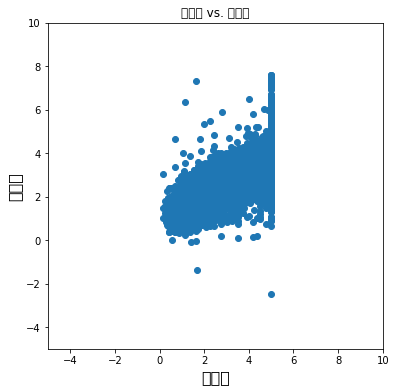

학습 MSE: 0.610
학습 RMSE: 0.781


In [215]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-5, 10) # X 범위
plt.ylim(-5, 10) # Y 범위
plt.show()

print('학습 MSE: {:.3f}'.format(mean_squared_error(train_data['House Value'], train_pred))) # 평균제곱오차 : 실제값과 예측값 비교, 작을수록 정답에 가깝다.
print('학습 RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['House Value'], train_pred)))) # 제곱근평균제곱오차 : 실제값과 예측값 비교, 작을수록 정답에 가깝다.

### 테스트 데이터 (Testing Data)에 대한 예측 성능 평가

In [216]:
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
14711,4.6250,21.0,6.589165,1.119639,984.0,2.221219,32.78,-117.08,2.228
10227,3.0465,32.0,4.064767,1.093264,835.0,2.163212,33.87,-117.89,1.489
17724,6.6800,10.0,7.329016,1.020725,1510.0,3.911917,37.33,-121.78,3.595
18612,6.0809,21.0,6.474168,1.026406,2670.0,3.065442,37.08,-122.07,2.700
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28,1.214


In [0]:
test_pred = myModel_trained.predict(test_data.drop(['House Value'], axis=1))

In [218]:
display(test_pred.head())

14711    2.290775
10227    2.019336
17724    2.727490
18612    2.790477
5088     0.949267
dtype: float64

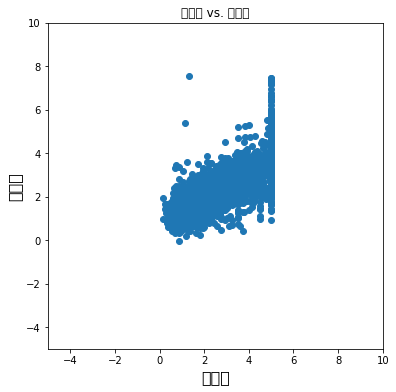

테스트 MSE: 0.592
테스트 RMSE: 0.769


In [219]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(test_data['House Value'], test_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-5, 10) # X 범위
plt.ylim(-5, 10) # Y 범위
plt.show()

print('테스트 MSE: {:.3f}'.format(mean_squared_error(test_data['House Value'], test_pred)))
print('테스트 RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['House Value'], test_pred))))